In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_pickle('fits/cluster_results_rank.pkl')

/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

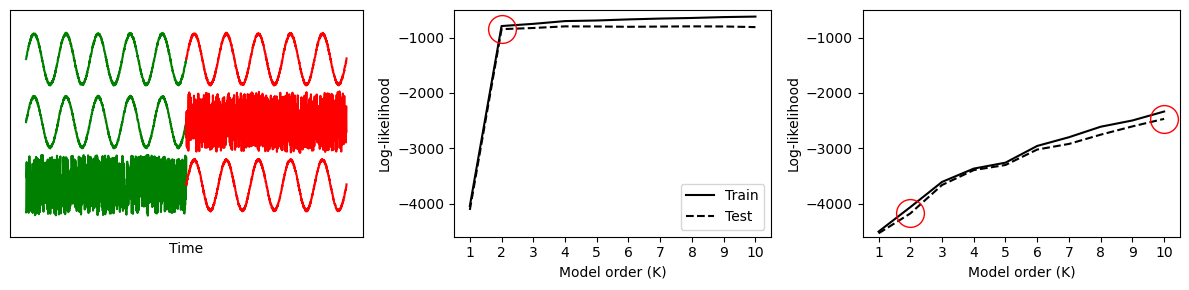

In [9]:
n = 1000
scale = 0.1
scale2 = 3*np.pi/4
# noise_level = 0.1
noises = np.zeros((3,n))
noises[0] = np.random.uniform(0, scale, n)
noises[1] = np.random.uniform(0, scale, n)
noises[2] = np.random.uniform(0, scale, n)
t = np.linspace(0, 5, n)
signal6 = np.zeros((3,1000))
signal6[0] = np.sin(2*np.pi*t)
signal6[1] = np.sin(2*np.pi*t) - 2.5
signal6[2] = np.random.uniform(-scale2/2, scale2/2, n) - 5
signal7 = np.zeros((3,1000))
signal7[0] = np.sin(2*np.pi*t)
signal7[1] = np.random.uniform(-scale2/2, scale2/2, n) -2.5
signal7[2] = np.sin(2*np.pi*t) -5

fig,axs = plt.subplots(1,3,figsize=(12,3),layout='tight',sharey=False,width_ratios=[1,0.9,0.9])
axs[0].plot(t,signal6.T+noises.T,label='Signal 1',color='green')
axs[0].plot(t+5,signal7.T+noises.T,label='Signal 1',color='red')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_ylim(-7, 2)
axs[0].set_yticks([])
# axs[0].set_title('Example signals')
axs[0].set_xlabel('Time')

sns.lineplot(data=df[df['modelname']=='Watson'],x='K',y='test_loglik',ax=axs[2],color='black',markers=True)
sns.lineplot(data=df[df['modelname']=='Watson'],x='K',y='train_loglik',ax=axs[2],color='black',markers=True)
#set the style for train to be dashed
axs[2].lines[0].set_linestyle("--")
# axs[2].set_title('Watson (rank-1 centroid)')
axs[2].set_xlabel('Model order (K)')
axs[2].set_ylim(-4600, -500)
axs[2].set_xlim(0.5,10.5)
axs[2].set_xticks([1,2,3,4,5,6,7,8,9,10]);
axs[2].set_ylabel('Log-likelihood')
# add a red circle on the point for K=2, no fill
axs[2].plot(2,df[(df['modelname']=='Watson')&(df['K']==2)&(df['inner']==0)]['test_loglik'],'ro',fillstyle='none',markersize=20)
axs[2].plot(10,df[(df['modelname']=='Watson')&(df['K']==10)&(df['inner']==0)]['test_loglik'],'ro',fillstyle='none',markersize=20)


sns.lineplot(data=df[df['modelname']=='ACG'],x='K',y='test_loglik',ax=axs[1],markers=True,color='black')
sns.lineplot(data=df[df['modelname']=='ACG'],x='K',y='train_loglik',ax=axs[1],markers=True,color='black')
#set the style for train to be dashed
axs[1].lines[0].set_linestyle("--")
# axs[1].set_title('ACG (rank-3 centroid)')
axs[1].set_xlabel('Model order (K)')
axs[1].set_ylabel('')
# add a red circle on the point for K=2, no fill
axs[1].plot(2,df[(df['modelname']=='ACG')&(df['K']==2)&(df['inner']==0)]['test_loglik'],'ro',fillstyle='none',markersize=20)
axs[1].set_ylim(-4600, -500)
axs[1].set_xlim(0.5,10.5)
axs[1].set_xticks([1,2,3,4,5,6,7,8,9,10]);
axs[1].set_ylabel('Log-likelihood')

axs[1].legend([plt.plot([],'k-')[0],plt.plot([],'k--')[0]],['Train','Test'],loc='lower right')

fig.savefig('figs/cluster_results_rank.png',bbox_inches='tight',dpi=300)